<a href="https://colab.research.google.com/github/Schwarzam/Spiral-and-Eliptical-/blob/master/NN_Tabelazoo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url = 'https://raw.githubusercontent.com/Schwarzam/Spiral-and-Eliptical-/master/group_2_zoo2.csv?token=APDNULOWV2BV2IVN2V464OC6WVPAU'
df = pd.read_csv(url)

In [0]:
SC = df['simple_class']

In [0]:
def regular (cols):
  SC = cols[0]

  if SC == 'S':
    return 'S'
  elif SC == 'SB':
    return 'S'
  elif SC == 'Se':
    return 'S'
  else: 
    return 'E'



In [0]:
Nov = df[['simple_class']].apply(regular, axis=1)

In [0]:
Class = pd.get_dummies(Nov, drop_first=True)

In [0]:
df['Class'] = Class
df.drop(['simple_class'], axis=1, inplace=True)

In [8]:
# To look which columns has nulls
print(df.loc[:, df.isnull().any()].columns)

Index(['dr8objid'], dtype='object')


In [0]:
df.drop(['dr8objid'], axis=1, inplace=True)

In [0]:
ret = list (df)[0:24]
dem = list (df)[24:-1]
dem2 = ['FWHM_n','MUMAX','A','B','FlRadDet','KrRadDet','nDet_auto','nDet_petro','nDet_aper','uJAVA_auto','euJAVA_auto','s2n_uJAVA_auto','uJAVA_petro',
 'euJAVA_petro','s2n_uJAVA_petro','uJAVA_aper','euJAVA_aper','s2n_uJAVA_aper','F378_auto','eF378_auto','s2n_F378_auto','F378_petro','eF378_petro','s2n_F378_petro','F378_aper',
 'eF378_aper','s2n_F378_aper','F395_auto','eF395_auto','s2n_F395_auto','F395_petro','eF395_petro','s2n_F395_petro','F395_aper','eF395_aper','s2n_F395_aper',
 'F410_auto','eF410_auto','s2n_F410_auto','F410_petro','eF410_petro','s2n_F410_petro','F410_aper','eF410_aper','s2n_F410_aper','F430_auto','eF430_auto',
 's2n_F430_auto','F430_petro','eF430_petro','s2n_F430_petro','F430_aper','eF430_aper','s2n_F430_aper','g_auto','eg_auto','s2n_g_auto','g_petro',
 'eg_petro','s2n_g_petro','g_aper','eg_aper','s2n_g_aper','F515_auto','eF515_auto','s2n_F515_auto','F515_petro','eF515_petro','s2n_F515_petro','F515_aper',
 'eF515_aper','s2n_F515_aper','r_auto','er_auto','s2n_r_auto','r_petro','er_petro','s2n_r_petro','r_aper','er_aper','s2n_r_aper','F660_auto',
 'eF660_auto','s2n_F660_auto','F660_petro','eF660_petro','s2n_F660_petro','F660_aper','eF660_aper','s2n_F660_aper','i_auto','ei_auto','s2n_i_auto',
 'i_petro','ei_petro', 's2n_i_petro', 'i_aper', 'ei_aper', 's2n_i_aper', 'F861_auto', 'eF861_auto', 's2n_F861_auto', 'F861_petro', 'eF861_petro',
 's2n_F861_petro', 'F861_aper', 'eF861_aper', 's2n_F861_aper','z_auto', 'ez_auto', 's2n_z_auto', 'z_petro', 'ez_petro', 's2n_z_petro', 'z_aper',
 'ez_aper','s2n_z_aper', 'zb', 'zb_Min', 'zb_Max', 'Tb', 'Odds', 'Chi2', 'M_B', 'Stell_Mass']

In [0]:
dem2 = ['FWHM_n','MUMAX','A','B','FlRadDet','KrRadDet','nDet_auto','nDet_aper','uJAVA_auto','euJAVA_auto','s2n_uJAVA_auto','uJAVA_aper','euJAVA_aper','s2n_uJAVA_aper','F378_auto','eF378_auto','s2n_F378_auto','s2n_F378_petro','F378_aper',
 'eF378_aper','s2n_F378_aper','F395_auto','eF395_auto','s2n_F395_auto','F395_aper','eF395_aper','s2n_F395_aper',
 'F410_auto','eF410_auto','s2n_F410_auto','F410_aper','eF410_aper','s2n_F410_aper','F430_auto','eF430_auto',
 's2n_F430_auto','F430_aper','eF430_aper','s2n_F430_aper','g_auto','eg_auto','s2n_g_auto','g_aper','eg_aper','s2n_g_aper','F515_auto','eF515_auto','s2n_F515_auto','F515_aper',
 'eF515_aper','s2n_F515_aper','r_auto','er_auto','s2n_r_auto','r_petro','r_aper','er_aper','s2n_r_aper','F660_auto','F660_aper','eF660_aper','s2n_F660_aper','i_auto','ei_auto','s2n_i_auto', 'i_aper', 'ei_aper', 's2n_i_aper', 'F861_auto', 'eF861_auto', 's2n_F861_auto',
 'F861_aper', 'eF861_aper', 's2n_F861_aper','z_auto', 'ez_auto', 's2n_z_auto', 's2n_z_petro', 'z_aper',
 'ez_aper','s2n_z_aper', 'M_B', 'Stell_Mass']

In [0]:
data_train = df[dem2]

In [0]:
X_train = data_train.rename_axis('ID').values[0:6500]
X_test = data_train.rename_axis('ID').values[5001:6500]
y_train = df['Class'].rename_axis('ID').values[0:6500]
y_test = df['Class'].rename_axis('ID').values[5001:6500]
x_val = data_train.rename_axis('ID').values[6501:8161]
y_val = df['Class'].rename_axis('ID').values[6501:8161]

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dense(512, activation='relu'))
#model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [62]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.0008),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train,
                    y_train,
                    epochs=40,
                    batch_size=4,
                    validation_data=(x_val, y_val))

Train on 6500 samples, validate on 1660 samples
Epoch 1/40
6500/6500 [==============================] - 3s 466us/step - loss: 0.5146 - acc: 0.8294 - val_loss: 0.6703 - val_acc: 0.8265
Epoch 2/40
6500/6500 [==============================] - 3s 454us/step - loss: 0.5746 - acc: 0.8277 - val_loss: 0.5491 - val_acc: 0.8223
Epoch 3/40
6500/6500 [==============================] - 3s 457us/step - loss: 0.5688 - acc: 0.8337 - val_loss: 0.6304 - val_acc: 0.8404
Epoch 4/40
6500/6500 [==============================] - 3s 455us/step - loss: 0.5311 - acc: 0.8329 - val_loss: 0.6056 - val_acc: 0.8337
Epoch 5/40
6500/6500 [==============================] - 3s 449us/step - loss: 0.4934 - acc: 0.8289 - val_loss: 0.5630 - val_acc: 0.8265
Epoch 6/40
6500/6500 [==============================] - 3s 450us/step - loss: 0.5259 - acc: 0.8314 - val_loss: 0.5720 - val_acc: 0.8361
Epoch 7/40
6500/6500 [==============================] - 3s 447us/step - loss: 0.5553 - acc: 0.8305 - val_loss: 0.6084 - val_acc: 0.7910


KeyboardInterrupt: ignored

<function matplotlib.pyplot.show>

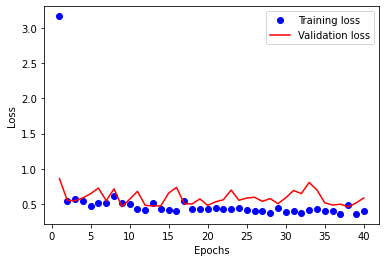

In [34]:
histo = history.history
loss_values = histo['loss']
val_loss_values = histo['val_loss']

epochs = range(1, len(histo['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

<function matplotlib.pyplot.show>

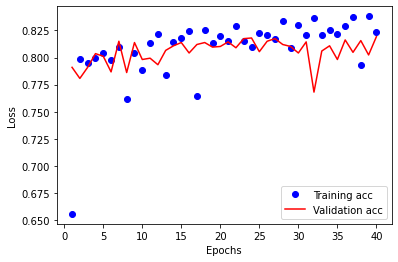

In [35]:
plt.clf()
acc_values = histo['acc']
val_acc_values = histo['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show